# colab 한글 깨짐 방지
- 실행후에 런타임 다시 시작할 것

In [ ]:
# !apt -qq -y install fonts-nanum > /dev/null

# import pandas as pd
# import numpy as np

# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
# import seaborn as sns

# sns.set_theme(style="darkgrid")

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font_name = fm.FontProperties(fname=fontpath).get_name() 
# # fm._rebuild()  


# %config InlineBackend.figure_format = 'retina'

# plt.rc('font', family=font_name)  
# plt.rcParams['axes.unicode_minus'] = False 

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')

# 앤스콤 4분할 그래프(Anscombe's quartet)
> Frank Anscombe이 데이터를 시각화하지 않고 수치만 확인할 때 발생할 수 있는 함정을 보여주기 위해 만든 그래프  
> - 앤스콤 그래프를 구성하는 데이터 집합은 4개의 그룹으로 구성되어 있다.
> - 4개의 데이터 그룹은 각각 평균, 분산과 같은 수칫값이나 상관관계, 회귀선이 모두 같다.
> - 이런 결과를 통해 4개의 데이터 그룹이 모두 같을 것이라고 착각을 할 수 있다.

### 4개의 그룹 데이터 로드

In [ ]:
anscombe = sns.load_dataset("anscombe")

anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [ ]:
anscombe.tail()

,dataset,x,y
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89


In [ ]:
anscombe['dataset'].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

In [ ]:
anscombe['dataset'] == 'I'

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
Name: dataset, dtype: bool

In [ ]:
anscombe['dataset']

0       I
1       I
2       I
3       I
4       I
5       I
6       I
7       I
8       I
9       I
10      I
11     II
12     II
13     II
14     II
15     II
16     II
17     II
18     II
19     II
20     II
21     II
22    III
23    III
24    III
25    III
26    III
27    III
28    III
29    III
30    III
31    III
32    III
33     IV
34     IV
35     IV
36     IV
37     IV
38     IV
39     IV
40     IV
41     IV
42     IV
43     IV
Name: dataset, dtype: object

In [ ]:
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [ ]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

## 통계 데이터 확인

In [ ]:
grouped = anscombe.groupby(['dataset', 'x'])

for key, group in grouped:
  print("* key", key)
  print("* count", len(group))
  print(group.head())
  print('\n')

* key ('I', 4.0)
* count 1
  dataset    x     y
7       I  4.0  4.26


* key ('I', 5.0)
* count 1
   dataset    x     y
10       I  5.0  5.68


* key ('I', 6.0)
* count 1
  dataset    x     y
6       I  6.0  7.24


* key ('I', 7.0)
* count 1
  dataset    x     y
9       I  7.0  4.82


* key ('I', 8.0)
* count 1
  dataset    x     y
1       I  8.0  6.95


* key ('I', 9.0)
* count 1
  dataset    x     y
3       I  9.0  8.81


* key ('I', 10.0)
* count 1
  dataset     x     y
0       I  10.0  8.04


* key ('I', 11.0)
* count 1
  dataset     x     y
4       I  11.0  8.33


* key ('I', 12.0)
* count 1
  dataset     x      y
8       I  12.0  10.84


* key ('I', 13.0)
* count 1
  dataset     x     y
2       I  13.0  7.58


* key ('I', 14.0)
* count 1
  dataset     x     y
5       I  14.0  9.96


* key ('II', 4.0)
* count 1
   dataset    x    y
18      II  4.0  3.1


* key ('II', 5.0)
* count 1
   dataset    x     y
21      II  5.0  4.74


* key ('II', 6.0)
* count 1
   dataset    x     y
17  

In [ ]:
anscombe[['x','y']].head()

,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33


In [ ]:
anscombe.groupby(['dataset'])[['x', 'y']].agg(['mean', 'std', 'var']) # 평균, 표준편차, 분산

x                         y                    
        mean       std   var      mean       std       var
dataset                                                   
I        9.0  3.316625  11.0  7.500909  2.031568  4.127269
II       9.0  3.316625  11.0  7.500909  2.031657  4.127629
III      9.0  3.316625  11.0  7.500000  2.030424  4.122620
IV       9.0  3.316625  11.0  7.500909  2.030579  4.123249

## 데이터 시각화 확인

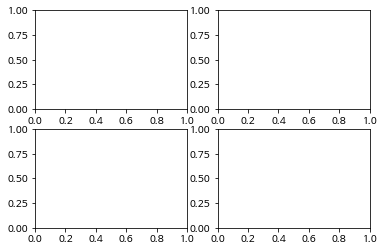

In [ ]:
fig = plt.figure()
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

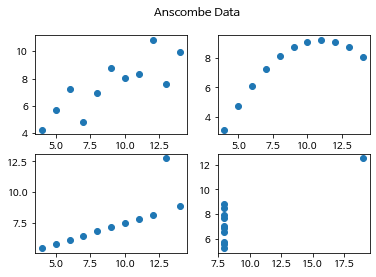

In [ ]:
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

fig.suptitle("Anscombe Data")
fig

# 데이터 시각화를 해야 하는 이유
> 데이터를 주제로 다룬 기사 가운데 '데이터 활용 능력'의 중요성을 강조하는 내용을 종종 볼 수 있습니다. 핵심은 얼마나 많은 양의 데이터를 보유하고 있느냐가 중요한 것이 아니라, 어떻게 활용할 것인가에 대한 답을 가졌는지 그 여부가, 데이터를 기반으로 한 가치 창출의 키라는 것입니다.    

> '데이터 활용 역량'이라 하면 크게 두 가지를 떠올릴 수 있습니다. '데이터 분석'과 '시각적 스토리텔링'입니다.
> - '데이터 분석'은 기술적으로 데이터를 수집하고 정제하는 데이터 가공 단계부터 분석 기법을 활용한 데이터 분석에 이르는 과정에 필요한 능력을 말합니다.  
> - '시각적 스토리텔링'은 데이터 분석 결과를 시각적으로 표현해 스토리텔링을 하는 능력입니다.   
  
과거에는 이 두 역량 간 경계가 뚜렷했던 반면, 최근에는 두 역량을 아우르는 '데이터 시각화'의 중요성이 강조되고 있습니다.



## 데이터 시각화의 장점들

### 많은 양의 데이터를 한눈에 볼 수 있다.

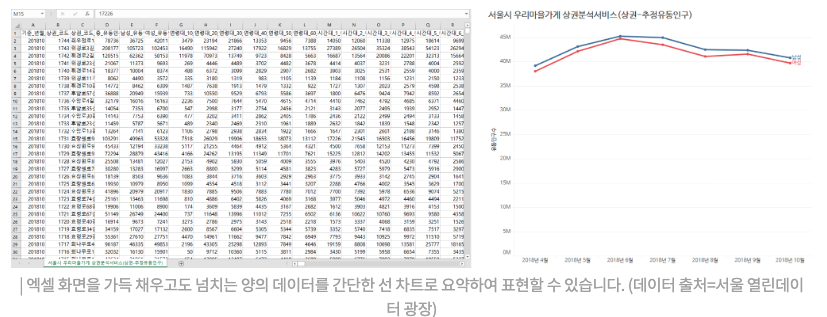

### 데이터 분석에 대한 전문 지식이 없어도, 누구나 쉽게 데이터 인사이트를 찾을 수 있다.
> 데이터 시각화 차트에서 시각화 요소의 형태, 크기, 위치나 색을 근거로 시각적 패턴을 찾을 수 있으며, 이를 통해 인사이트를 얻을 수 있다.

### 요약 통계보다 정확한 데이터 분석 결과를 도출할 수 있다.
> 앤스콤 데이터와 같이 때로는 요약 통계보다 정확한 데이터 분석 결과를 얻을 수 있다. 

In [ ]:
anscombe.groupby('dataset')[['x','y']].agg(['mean', 'std', 'var'])

x                         y                    
        mean       std   var      mean       std       var
dataset                                                   
I        9.0  3.316625  11.0  7.500909  2.031568  4.127269
II       9.0  3.316625  11.0  7.500909  2.031657  4.127629
III      9.0  3.316625  11.0  7.500000  2.030424  4.122620
IV       9.0  3.316625  11.0  7.500909  2.030579  4.123249

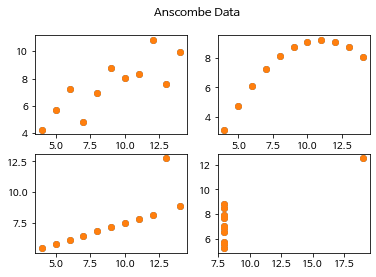

In [ ]:
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

fig.suptitle("Anscombe Data")
fig

### 효과적인 데이터 인사이트 공유로 데이터 기반의 의사결정을 할 수 있다.
> 프레젠테이션 문서 등을 통해 효과적으로 인사이트를 전달할 수 있다.

# Auto ViML

In [ ]:
# 구글 드라이브 연결(데이터 로드를 위해서)
from google.colab import drive
drive.mount('/content/data')

Mounted at /content/data


In [ ]:
DATA_PATH = "/content/data/MyDrive/lecture/data/"

df = pd.read_csv(DATA_PATH+"Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## [sweetviz](https://www.kaggle.com/code/hwangchanghyun/sweetviz-auto-visualization-library-for-you)

In [ ]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 44.8 MB/s eta 0:00:00


In [ ]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.7.1
Uninstalling matplotlib-3.7.1:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/matplotlib-3.7.1-py3.9-nspkg.pth
    /usr/local/lib/python3.9/dist-packages/matplotlib-3.7.1.dist-info/*
    /usr/local/lib/python3.9/dist-packages/matplotlib/*
    /usr/local/lib/python3.9/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.9/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.9/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.9/dist-packages/pylab.py
Proceed (Y/n)?   ERROR: Operation cancelled by user
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━ 29.0/40.9 MB 102.8 MB/s eta 0:00:01

In [ ]:
import sweetviz as sv

In [ ]:
feature_config = sv.FeatureConfig(skip="PassengerId", force_text=["Age"])

In [ ]:
my_report = sv.compare_intra(df, df["Sex"] == "male", ["Male", "Female"],'Survived', feature_config)

In [ ]:
my_report.show_notebook(scale=0.9)

## [dataprep](https://www.kaggle.com/code/andreshg/automatic-eda-libraries-comparisson)

In [1]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 37.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 9.

In [2]:
from dataprep.eda import plot, plot_correlation, create_report, plot_missing

In [3]:
plot(df)

NameError: ignored

In [ ]:
create_report(df)